### Preprocessing for english dataset and analysis

In [1]:
# setup only
# nltk.download()

In [2]:
# libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
from __future__ import print_function
import nltk

In [6]:
# load data
df = pd.read_csv("english1970_data.csv", encoding="utf-8")
df.shape

(1970, 2)

In [11]:
# convert data to lowercase, split
df = pd.read_csv("english1970_data.csv")
df.columns = ['comment_eng','sarc_majority']
df['comment_eng'] = df['comment_eng'].str.lower().str.split()

In [12]:
# length of each data
df['length'] = df['comment_eng'].map(lambda text: len(text))
df.head()

,comment_eng,sarc_majority,length
0,"[more, people, will, bear, it, appears]",sarc,6
1,"[have, you, greed, of, money, people, want, to...",non-sarc,70
2,"[radio, television, lid, do, not, hear, the, p...",sarc,15
3,"[yes, you're, whipping, people, is, a, great, ...",non-sarc,17
4,"[ooi, government, national, front, you, people...",non-sarc,48


In [13]:
# apply stopword
from nltk.corpus import stopwords

stop = stopwords.words('stoplist.engmalay(combine).txt')
df['comment_eng'] = df['comment_eng'].apply(lambda x: [item for item in x if item not in stop])
df['sarc_majority'] = df['sarc_majority']

In [75]:
# length of each data after stopword
df['length'] = df['comment_eng'].map(lambda text: len(text))
df.head()

,comment_eng,sarc_majority,length
0,"[people, bear, appears]",sarc,3
1,"[greed, money, people, want, big, spending, pl...",non-sarc,35
2,"[radio, television, lid, hear, promise, budget...",sarc,8
3,"[yes, you're, whipping, people, great, budget,...",non-sarc,10
4,"[ooi, government, national, front, people, awa...",non-sarc,22


In [77]:
df.dtypes

comment_eng      object
sarc_majority    object
length            int64
dtype: object

In [78]:
len (df)

1970

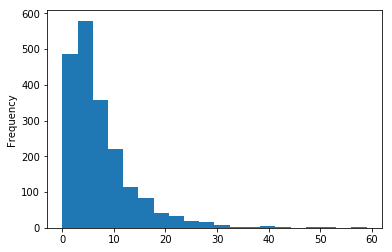

In [18]:
# plot histogram for length data frequency
df.length.plot(bins=20, kind='hist')

In [19]:
df.length.describe()

count    1970.000000
mean        6.979695
std         6.696238
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        59.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c10ebda58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2c10ed65c0>], dtype=object)

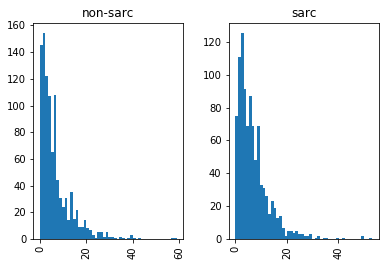

In [20]:
# plot histogram for length data frequency by type
df.hist(column='length', by='sarc_majority', bins=50)

In [ ]:
# save to 
df.to_csv('english1970_data-pre.csv', index=False)
